<h1 align = "center" style = "color:green"> Newton Raphson Method </h1>

---

In [5]:
# Import necessary modules
import numpy as np 
import matplotlib.pyplot as plt
try:
    plt.style.use(["science", "notebook", "grid", "dark_background"])
except:
    # Install scienceplots
    print("SciencePlots not installed. Installing...")
    import subprocess
    subprocess.run(["pip", "install", "scienceplots"])
    import scienceplots
    plt.style.use(["science", "notebook", "grid", "dark_background"])

Newton's Method, also known as the Newton-Raphson Method, is a powerful and widely used technique for finding successively better approximations to the roots (or zeroes) of a real-valued function. It's particularly known for its rapid convergence when starting close to a zero.

#### Basic Principle

Newton's Method is based on the use of the first-order Taylor series expansion of a function. The key idea is to start with an initial guess for a root, and then iteratively improve the estimate by using the derivative of the function.

<img src = "../Newton_Raphson_method/images/visualization.gif" height = 400px>

#### The Algorithm

The method can be outlined as follows:

1. **Start with an Initial Guess**: Select an initial guess $x_0$ for the root.

2. **Iterative Process**: Repeat the following steps until the desired level of accuracy is achieved:
   
   - Compute the next approximation $x_{n+1}$ using the formula:
     $$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$
   - Here, $f(x_n)$ is the value of the function at $x_n$, and $f'(x_n)$ is the value of its derivative at $x_n$.

3. **Convergence Check**: The process is typically stopped when the change in $x$ is below a certain threshold, or after a predetermined number of iterations.

#### Requirements and Considerations

- **Differentiable Function**: The function $f(x)$ must be differentiable, and its derivative should not be zero at the root. If $f'(x_n) = 0$, the method will fail.

- **Initial Guess**: The convergence of Newton's Method is highly dependent on the initial guess. A poor initial guess can lead to divergence or convergence to a non-desired root.

- **Convergence Speed**: When close to the root and under suitable conditions, Newton's Method converges quadratically, meaning that the number of correct digits roughly doubles in each step.

- **Multiple Roots or Complex Roots**: Newton's Method can be modified to find multiple roots or to work with complex functions, but these scenarios require additional considerations.

<img src = "../Newton_Raphson_method/images/flowchart.png.webp">

In [18]:
def newton_raphson(f, x0, h: float = 1e-5, max_iter:int = 1000, tol:float = 1e-3) -> float:
    """ The Newton-Raphson method for finding roots of a function.
    Args:
        f : A function whose derivative is required
        x0(float) : The initial guess for the root. 
            NOTE: This is a very important parameter and 
                 can affect the convergence of the algorithm
        h(float) : Step size for calculating the derivative
        max_iter(int) : Maximum number of iterations
        tol(float) : Tolerance for convergence
    Returns:
        x : The estimated root of the function
    """
    # First we define the derivative function
    def df(f, x:float, h:float) -> float:
        """Calculate the derivative of a function f
        Args:
            f : The function to calculate the derivative of
            x(float) : The point at which to calculate the derivative
            h(float) : The step size to use
        Returns:
            (float): The derivative at point x"""
        return (f(x + h) - f(x - h))/(2 * h) # The central difference formula

    # Algorithm starts iteratively
    for _ in range(max_iter):
        x_new : float = x0 - f(x0)/df(f, x0, h)  # The Newton-Raphson step

        if (abs(x_new - x0) < tol) or (abs(f(x_new)) < tol):  # Stopping condition
            """we implemented two stopping conditions
            1. If the difference between the new and old estimate is less than the tolerance
            2. If the function evaluated at the new estimate is less than the tolerance
            this increases the robustness of the algorithm. The second condition prevents
            the algorithm from oscillating around the root."""
            print(f"Converged to root in {_} iterations")
            return x_new  # Return the estimate
        x0 = x_new  # Update the guess

    # If max_iters are exhausted, raise an error
    raise ValueError(f"Could not converge to root in {max_iter} iterations. Last estimate is {x0}")

## Visualization

Converged to root in 1 iterations
The root of the function is 0.567
The function value at the root is 0.0000


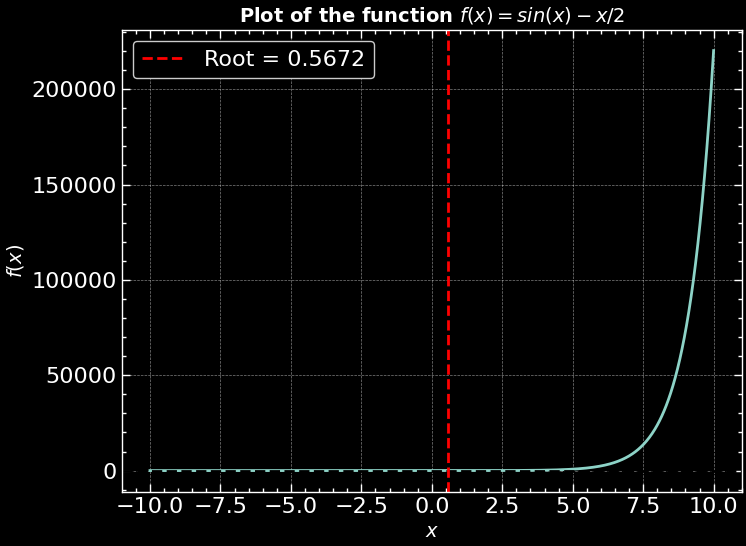

In [21]:
test_func = lambda x : x*np.exp(x) - 1 # Define a test function
x : np.ndarray = np.linspace(-10, 10, 1000)

# Find the root of the function
INITIAL_GUESS : float = 0.5
root : float = newton_raphson(test_func, INITIAL_GUESS)
print(f"The root of the function is {root:.3f}")
print(f"The function value at the root is {test_func(root):.4f}")

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, test_func(x))
plt.axhline(0, color="black", linestyle="--")
plt.axvline(root, color="red", linestyle="--", label=f"Root = {root:.4f}")
plt.xlabel("$x$", fontsize=14, fontweight="bold")
plt.ylabel("$f(x)$", fontsize=14, fontweight="bold")
plt.title("Plot of the function $f(x) = sin(x) - x/2$", fontsize=14, fontweight="bold")
plt.legend();

Analyzing the time and space complexity of your Newton-Raphson method implementation involves examining the resources it requires as a function of the input size. For this method, the input size isn't defined by the usual metrics like array or string length; instead, it's more about the characteristics of the function $f$, such as its complexity, and the convergence criteria like tolerance and maximum iterations.

### Time Complexity

1. **Function Evaluations Per Iteration**: The primary operations in each iteration are evaluating the function $f(x)$ and its derivative. The complexity of these operations depends on the complexity of $f$. Assuming $f$ and its derivative can be computed in constant time, these operations are $O(1)$.

2. **Number of Iterations**: The number of iterations depends on the initial guess, the nature of the function, and the convergence criteria (tolerance and maximum iterations). Under favorable conditions, the Newton-Raphson method converges quadratically, meaning that the number of correct digits roughly doubles with each iteration. However, this ideal behavior can vary significantly with different functions and starting points.

3. **Overall Time Complexity**: If the maximum number of iterations is not reached, and the function and its derivative are $O(1)$, the overall time complexity would be approximately $O(M)$, where $M$ is the number of iterations taken to meet the tolerance criteria. This is under the assumption that each iteration takes a constant amount of time.

### Space Complexity

1. **Variables Used**: The algorithm uses a fixed amount of space for variables like `x0`, `x_new`, and `h`. The space required does not depend on the size of the input or the complexity of the function.

2. **Function Evaluation Space**: The space complexity also depends on the space required to evaluate the function $f$ and its derivative. Assuming these evaluations require constant space, the overall space complexity would be $O(1)$.

### Considerations

- The actual time complexity can vary depending on the complexity of the function $f$ and how quickly the method converges based on the initial guess and the nature of the function.
- The quadratic convergence of Newton's method is a best-case scenario and is not guaranteed for all functions or all initial guesses.
- The analysis assumes that arithmetic operations (addition, subtraction, division) take constant time, which is a standard assumption in complexity analysis but can vary for very large numbers or in certain computational environments.

In summary, the Newton-Raphson method typically has a linear time complexity in terms of iterations, with each iteration presumed to be $O(1)$ if the function evaluations are constant time. The space complexity is constant, $O(1)$, assuming the function evaluations do not require additional space that scales with the input size.


#### Advantages and Disadvantages

- **Advantages**: Fast convergence near the root; only requires function values and first derivatives.

- **Disadvantages**: Requires a good initial guess; function must be differentiable; potential issues with functions having horizontal tangents (where the derivative is zero).

#### Applications

Newton's Method is used in various fields, from finding roots in mathematical equations to optimization problems in engineering and physics. It's also a fundamental tool in numerical methods for solving nonlinear equations.

#### Example

To illustrate, consider finding the root of $f(x) = x^2 - 2$. Given an initial guess $x_0$, the iteration formula becomes $x_{n+1} = x_n - \frac{x_n^2 - 2}{2x_n}$. Repeated application of this formula will converge to the square root of 2, assuming a suitable initial guess.

Newton's Method exemplifies an elegant application of calculus to numerical analysis, showcasing how derivatives can be used to find function roots efficiently.